# UK Elections Analysis

This iPython notebook will represent an analysis of UK voting patterns and records.  So far, full election results have been obtained for the 2005, 2010 and 2015 UK general elections.  Polling data has been obtained going back into the 1940s which represents a wealth of data from which to study from.

The first thing I will want to do is understand my data and what it looks like.  For a start, here is what information I have for the 2015 UK general election.  This one was particularly interesting as it dumbfounded the pollsters who thought that there would be a hung parliament but it turned out to be a Conservative majority.

The analysis of the polling information is quite detailed so I will put that in a separate iPython notebook.

In [1]:
# First of all, import files into python
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
results_2015_df = pd.read_csv("./Data/UK_Election_2015/2015-UK-General-election-data-collated-results-Results.csv")
constituency_2015_df = pd.read_csv("./Data/UK_Election_2015/2015-UK-General-election-data-collated-results-Constituency.csv")


In [3]:
results_2015_df.head(15)

,Forename,Surname,Description on ballot paper,Constituency Name,PANo,Votes,Share
0,Stephen,Kinnock,Welsh Labour/Llafur Cymru,Aberavon,1,15416,48.90
1,Peter,Bush,UK Independence Party (UKIP),Aberavon,1,4971,15.77
2,Edward,Yi He,Welsh Conservative Party Candidate/Ymgeisydd P...,Aberavon,1,3742,11.87
3,Duncan,Higgitt,Plaid Cymru - The Party of Wales,Aberavon,1,3663,11.62
4,Helen,Clarke,Welsh Liberal Democrats - Democratiaid Rhyddfr...,Aberavon,1,1397,4.43
5,Captain,Beany,Independent,Aberavon,1,1137,3.61
6,Jonathan,Tier,Green Party/Plaid Werdd,Aberavon,1,711,2.26
7,Andrew,Jordan,Socialist Labour Party/Plaid Lafur Sosialaidd,Aberavon,1,352,1.12
8,Owen,Herbert,Trade Unionist and Socialist Coalition,Aberavon,1,134,0.43
9,Guto,Bebb,Welsh Conservative Party Candidate/Ymgeisydd P...,Aberconwy,2,12513,41.51


So, the results dataframe contains the name of the candidate, their party, their constituency, their total number of votes and their percentage of the vote.  It is sorted by constituency in alphabetical order.  Inside each constituency, it appears to be sorted by percentage of the vote share.

In [4]:
constituency_2015_df.head()

,PANo,Constituency Name,Constituency ID,Constituency Type,Electorate,Valid Votes,Unnamed: 6
0,1,Aberavon,W07000049,County,49821,31523,NaN
1,2,Aberconwy,W07000058,County,45540,30148,NaN
2,3,Aberdeen North,S14000001,Burgh,67745,43936,NaN
3,4,Aberdeen South,S14000002,Burgh,68056,48551,NaN
4,5,West Aberdeenshire and Kincardine,S14000058,County,73445,55196,NaN


The constituency cvs file gives the name of the constituency, its ID (W stands for Wales, S for Scotland), it's type (a County is more rural and a Burgh is a city, in the above example).  Also given are the Electorate, which is the number of people allowed to vote together with the number of valid votes cast.  From this, I can work out the turnout for each constituency!

To make things easier, the first thing I will do is rename the columns in order to get rid of the spaces.

In [5]:
constituency_2015_df.columns = ["PANo","Constituency_Name","Constituency_ID","Constituency_Type","Electorate","Valid_Votes","Unnamed"]

In [6]:
constituency_2015_df.head()

,PANo,Constituency_Name,Constituency_ID,Constituency_Type,Electorate,Valid_Votes,Unnamed
0,1,Aberavon,W07000049,County,49821,31523,NaN
1,2,Aberconwy,W07000058,County,45540,30148,NaN
2,3,Aberdeen North,S14000001,Burgh,67745,43936,NaN
3,4,Aberdeen South,S14000002,Burgh,68056,48551,NaN
4,5,West Aberdeenshire and Kincardine,S14000058,County,73445,55196,NaN


Now I will drop the unnamed column and also create my turnout column

In [7]:
constituency_2015_df.drop("Unnamed",axis=1,inplace=True)

In [9]:
constituency_2015_df["Turnout"] = 100*(constituency_2015_df.Valid_Votes/constituency_2015_df.Electorate)

In [10]:
constituency_2015_df.head()

,PANo,Constituency_Name,Constituency_ID,Constituency_Type,Electorate,Valid_Votes,Turnout
0,1,Aberavon,W07000049,County,49821,31523,63.272516
1,2,Aberconwy,W07000058,County,45540,30148,66.201142
2,3,Aberdeen North,S14000001,Burgh,67745,43936,64.854971
3,4,Aberdeen South,S14000002,Burgh,68056,48551,71.339779
4,5,West Aberdeenshire and Kincardine,S14000058,County,73445,55196,75.152835


So now I have a dataframe which I can work with.  I may want to add things such as 'Country' to this dataframe and probably want to transfer some of this informtion from the constituency dataframe into the main election dataframe.

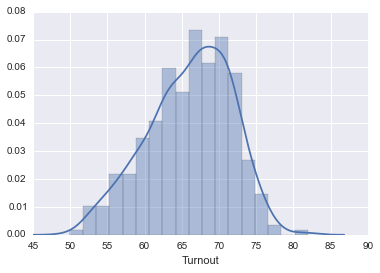

In [11]:
sns.distplot(constituency_2015_df['Turnout'])

If I just plot the turnout, then this looks like it was a relatively high turnout.  It will be good to look at this as a factor of region, party victory and also years.

In [12]:
election_2010 = pd.read_excel("Data/UK_Election_2010/GE2010-results-flatfile-website.xls")
constituency_2010 = pd.read_excel("Data/UK_Election_2010/GE2010-constituency-results-website.xls")
turnout_2010 = pd.read_excel("Data/UK_Election_2010/GE2010-turnout-admin-web.xls")

In [13]:
election_2010.head(15)

,Press Association Reference,Constituency Name,Region,Election Year,Electorate,Votes,AC,AD,AGS,APNI,...,UKIP,UPS,UV,VCCA,Vote,Wessex Reg,WRP,You,Youth,YRDPL
0,1,Aberavon,Wales,2010,50838,30958,NaN,NaN,NaN,NaN,...,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Aberconwy,Wales,2010,44593,29966,NaN,NaN,NaN,NaN,...,632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Aberdeen North,Scotland,2010,64808,37701,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Aberdeen South,Scotland,2010,64031,43034,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Aberdeenshire West & Kincardine,Scotland,2010,66110,45195,NaN,NaN,NaN,NaN,...,397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Airdrie & Shotts,Scotland,2010,62364,35849,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Aldershot,South East,2010,71465,45384,NaN,NaN,NaN,NaN,...,2041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Aldridge-Brownhills,West Midlands,2010,58909,38634,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Altrincham & Sale West,North West,2010,72208,49393,NaN,NaN,NaN,NaN,...,1563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Alyn & Deeside,Wales,2010,60931,39923,NaN,NaN,NaN,NaN,...,1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
constituency_2010.head(15)

,General election results 2010,Unnamed: 1,Unnamed: 2,Party,Votes,Share,*lost deposit,change since 2005,Unnamed: 8
0,Aberavon [1],NaN,,,,,,,
1,50838,60.9,"Francis, H.*",Lab,16073,51.9,NaN,-,8.1
2,NaN,,"Davies, K.",LD,5034,16.3,NaN,+,2.5
3,NaN,,"Jones, C.Y. Ms.",Con,4411,14.2,NaN,+,4.1
4,NaN,,"Nicholls-Jones, P.",PC,2198,7.1,NaN,-,4.7
5,NaN,,"Edwards, K.A.",BNP,1276,4.1,*,NaN,
6,NaN,,"Tutton, A.",Ind,919,3,*,NaN,
7,NaN,,"Beany, C.",Bean,558,1.8,*,NaN,
8,NaN,,"Callan, J.",UKIP,489,1.6,*,NaN,
9,NaN,,,,-----,---,NaN,,


In [15]:
turnout_2010

,Electoral data for the 6 May 2010 UK Parliamentary general election
0,Contents
1,"Key data - Data for each constituency, includi..."
2,"Administration - Data for each constituency, c..."
3,Aggregate data - Gives data from the 'Basic da...
4,2005-10 comparison - Compares some key data fo...
5,Notes
6,All data were collected from (Acting) Returnin...
7,Because of changes to constituency boundaries ...
8,The 'Administration' and 'Aggregate data' shee...
9,Sub-categories of postal vote rejection may no...
